# Prediction of the oversee trips q1 2012- q4 2019

Abstract:
The aim of this analysis is to assess the components of the 
time series Oversea Trips, implement some models, run the 
relevant diagnostic tests and choose the best model. From the 
models the forecasting will be executed with illustrative 
graphics and an assessment of the chosen model will be 
provided. 

Conclusions:
In this analysis we run 3 predictive models:
- Mean model.
- Exponential smoothing model.
- Arima model (auto version).
In all cases, the errors are normally distributed. The smallest 
RMSE and MAE are very similar for the last 2 models, 
between 50 and 72. 
Because the Exponential smoothing model has a more normal 
distribution of the error, this is the model chosen.

In [ ]:
trips <- read.csv('OverseasTrips.csv')

In [71]:
head(trips)

,ï..Quarter,Trips.Thousands.
,<chr>,<dbl>
1,2012Q1,1165.1
2,2012Q2,1817.3
3,2012Q3,2096.7
4,2012Q4,1438.0
5,2013Q1,1251.7
6,2013Q2,1893.0


In [72]:
trips<-trips['Trips.Thousands.']

In [73]:
head(trips)

,Trips.Thousands.
,<dbl>
1,1165.1
2,1817.3
3,2096.7
4,1438.0
5,1251.7
6,1893.0


In [74]:
trips <- ts(trips, start=c(2012,1), frequency=4)

In [75]:
trips

,Qtr1,Qtr2,Qtr3,Qtr4
2012,1165.1,1817.3,2096.7,1438.0
2013,1251.7,1893.0,2261.0,1580.1
2014,1342.5,2126.6,2440.4,1694.9
2015,1531.3,2344.9,2770.9,1995.9
2016,1784.7,2598.9,3061.5,2139.2
2017,1796.1,2769.4,3095.6,2270.9
2018,1920.7,2951.9,3330.9,2412.8
2019,2026.7,3021.8,3334.4,2424.6


In [76]:
class(trips)                                             

[1] "ts"

In [77]:
start(trips)

[1] 2012    1

In [78]:
end(trips)

[1] 2019    4

In [79]:
frequency(trips)

[1] 4

# Assessment of the components of the raw time series.

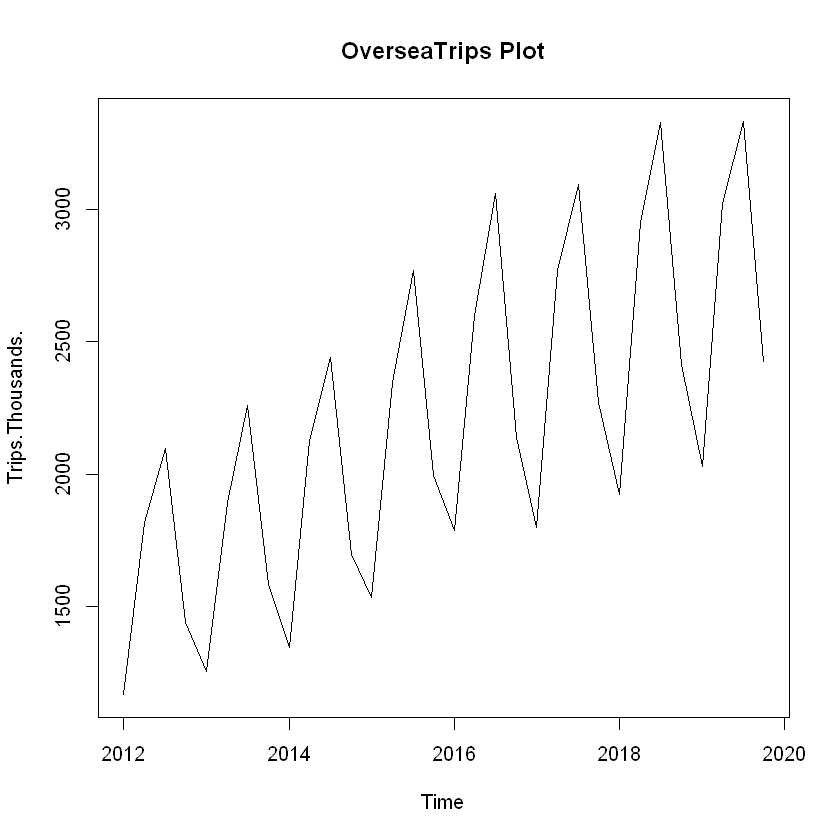

In [12]:
plot(trips, main="OverseaTrips Plot")

The boxplot per month shows us the pattern of the yearly cycle (**Note:** `cycle` is a utility that numbers the data items cyclic according to frequency)

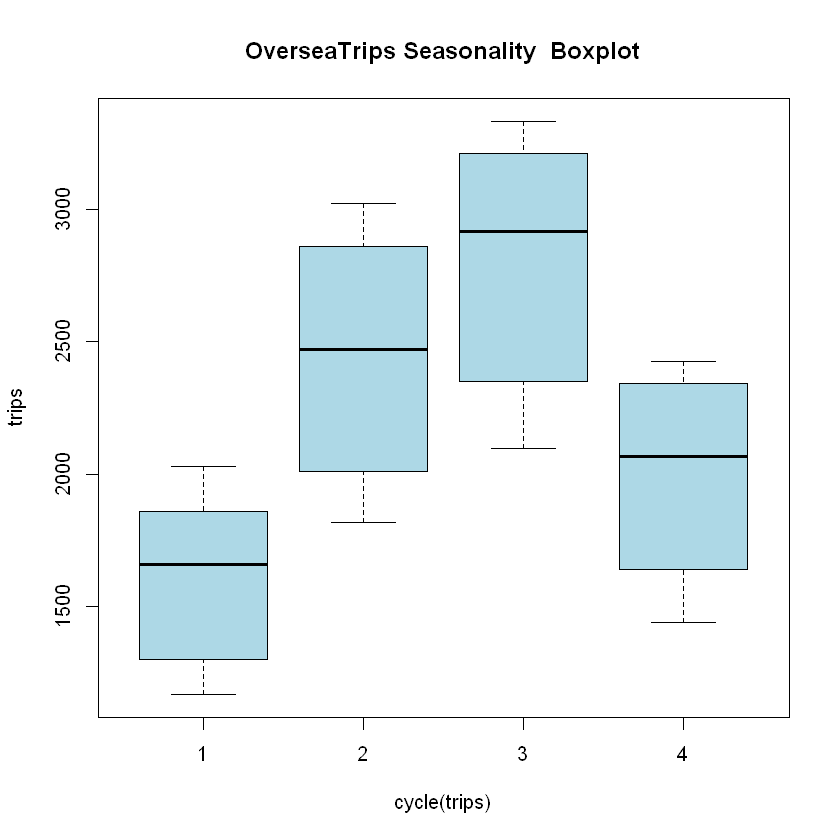

In [13]:
boxplot(trips~cycle(trips), col='lightblue',main="OverseaTrips Seasonality  Boxplot")

The boxplot per year gives us a summary of the trend over the years. (**Note:** Time is a floating point variable that interpolates the time interval between the years. `floor` cuts it down to the actual year.)

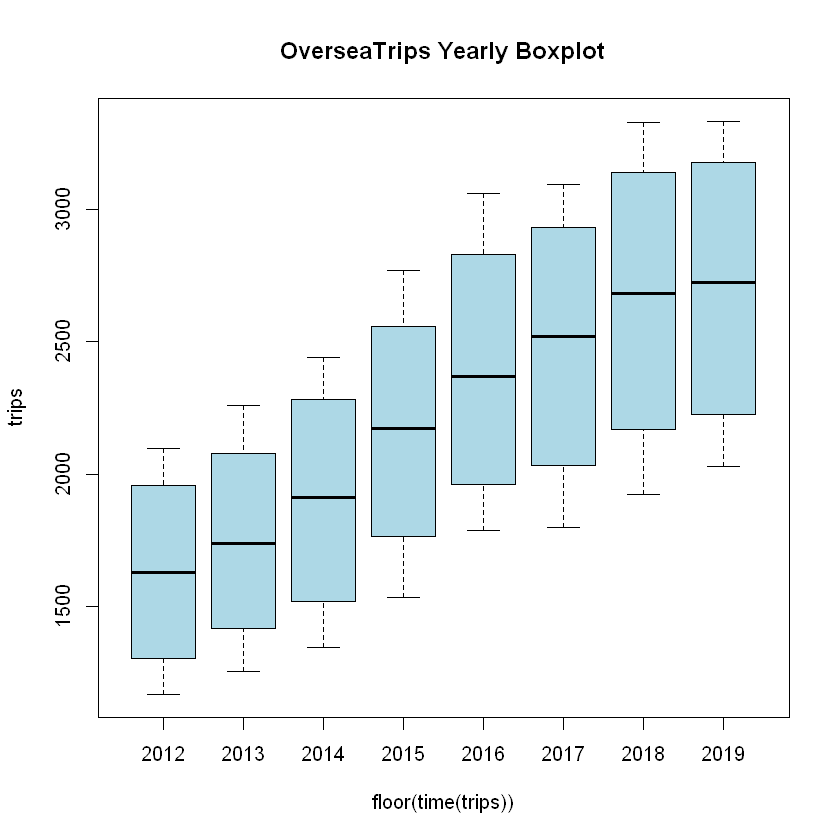

In [14]:
boxplot(trips~floor(time(trips)), col='lightblue', main="OverseaTrips Yearly Boxplot") 

## Seasonal Plots

In [14]:
library(forecast)
library(ggplot2)

Warning message:
"package 'forecast' was built under R version 4.0.4"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'ggplot2' was built under R version 4.0.4"


The Seasonal plot shows the data plotted against the individual seasons in which the data were observed:

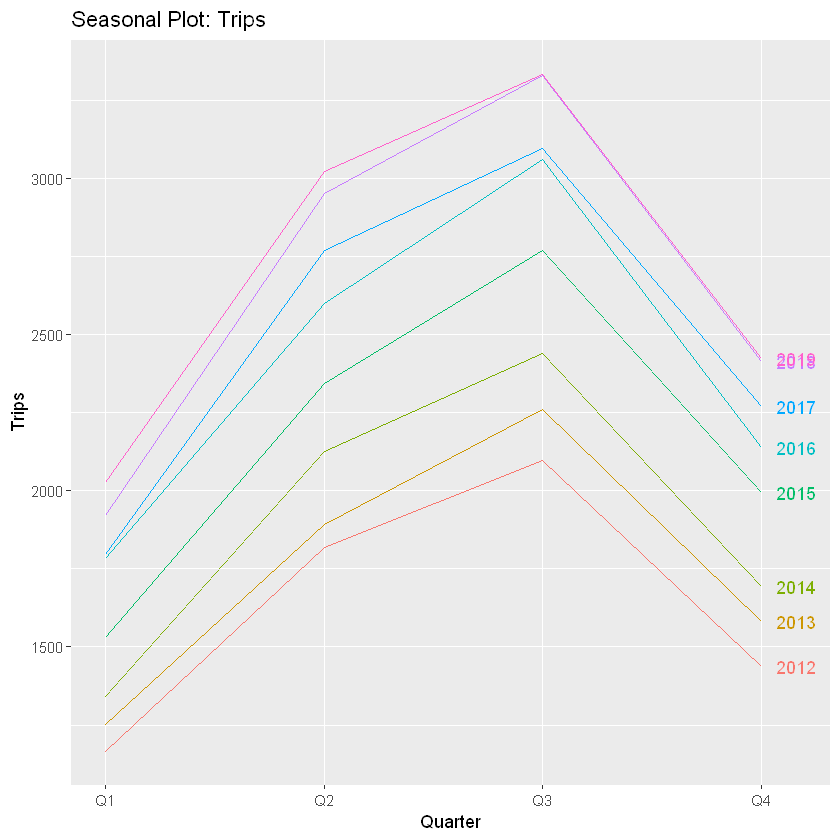

In [15]:
ggseasonplot(trips, year.labels=TRUE, years.labels.left=TRUE)+ylab('Trips')+ggtitle('Seasonal Plot: Trips')

## Seasonal subseries plots

The data for each season are collected togerher in separate mini plots. The orizontal line indicates the mean of each quarter. Each of the 4 oblique lines contain the data of each season each year

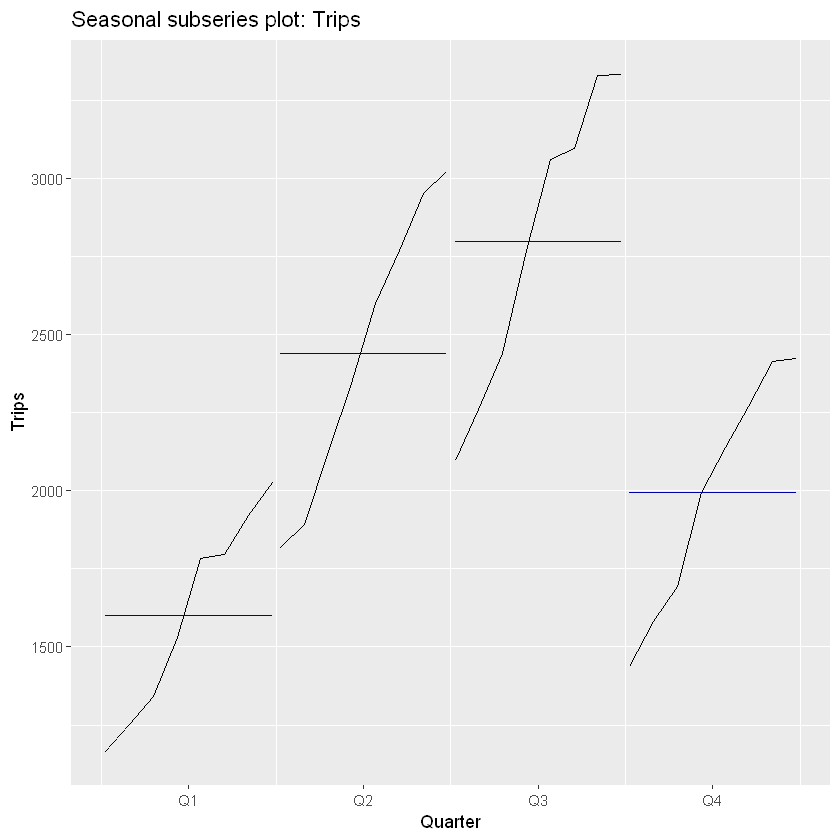

In [16]:
ggsubseriesplot(trips)+ylab('Trips')+ggtitle('Seasonal subseries plot: Trips')
# or simply monthplot(trips)

## Seasonal Decomposition using Decompose multiplicative

Since the size of the fluttuations in the late years is bigger than the one in the early years, we use the multiplicative model

$x
       Qtr1   Qtr2   Qtr3   Qtr4
2012 1165.1 1817.3 2096.7 1438.0
2013 1251.7 1893.0 2261.0 1580.1
2014 1342.5 2126.6 2440.4 1694.9
2015 1531.3 2344.9 2770.9 1995.9
2016 1784.7 2598.9 3061.5 2139.2
2017 1796.1 2769.4 3095.6 2270.9
2018 1920.7 2951.9 3330.9 2412.8
2019 2026.7 3021.8 3334.4 2424.6

$seasonal
          Qtr1      Qtr2      Qtr3      Qtr4
2012 0.7439227 1.1109252 1.2651479 0.8800042
2013 0.7439227 1.1109252 1.2651479 0.8800042
2014 0.7439227 1.1109252 1.2651479 0.8800042
2015 0.7439227 1.1109252 1.2651479 0.8800042
2016 0.7439227 1.1109252 1.2651479 0.8800042
2017 0.7439227 1.1109252 1.2651479 0.8800042
2018 0.7439227 1.1109252 1.2651479 0.8800042
2019 0.7439227 1.1109252 1.2651479 0.8800042

$trend
         Qtr1     Qtr2     Qtr3     Qtr4
2012       NA       NA 1640.100 1660.387
2013 1690.387 1728.688 1757.800 1798.350
2014 1849.975 1886.750 1924.700 1975.587
2015 2044.188 2123.125 2192.425 2255.850
2016 2323.925 2378.163 2397.500 2420.238
2017 2445.812 2466.538 2498.57

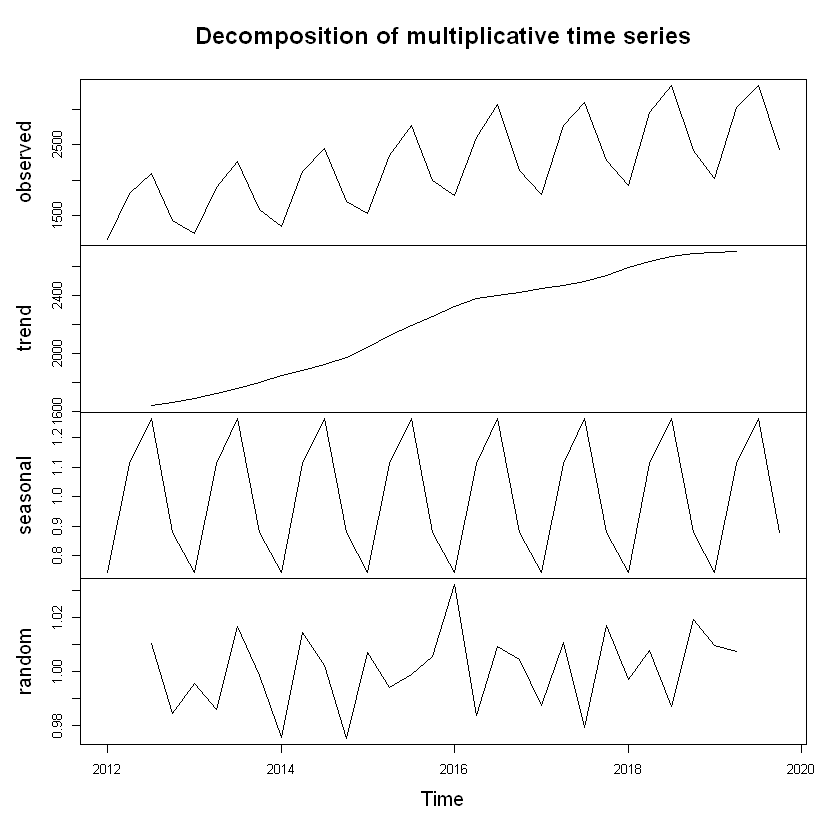

In [16]:
fit.decmult<-decompose(trips,type='multiplicative')
fit.decmult
plot(fit.decmult)

- Fit a minimum of three candidate time series models (simple models, exponential smoothing models and non-seasonal and/or seasonal ARIMA models).

- Perform and explain the appropriate diagnostic tests and checks and describe the rationale for your choice of ‘optimum’ model for each series. 

- Forecast each series for three periods ahead with appropriate prediction intervals and illustrative graphics and provide your assessment of the adequacy of the chosen model.

# Forecasting Using Mean Model

In [66]:
library(fpp2)

In [67]:
fcast.mean<-meanf(trips,h=3)
fcast.mean

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2020 Q1       2209.075 1400.589 3017.561 949.8425 3468.308
2020 Q2       2209.075 1400.589 3017.561 949.8425 3468.308
2020 Q3       2209.075 1400.589 3017.561 949.8425 3468.308

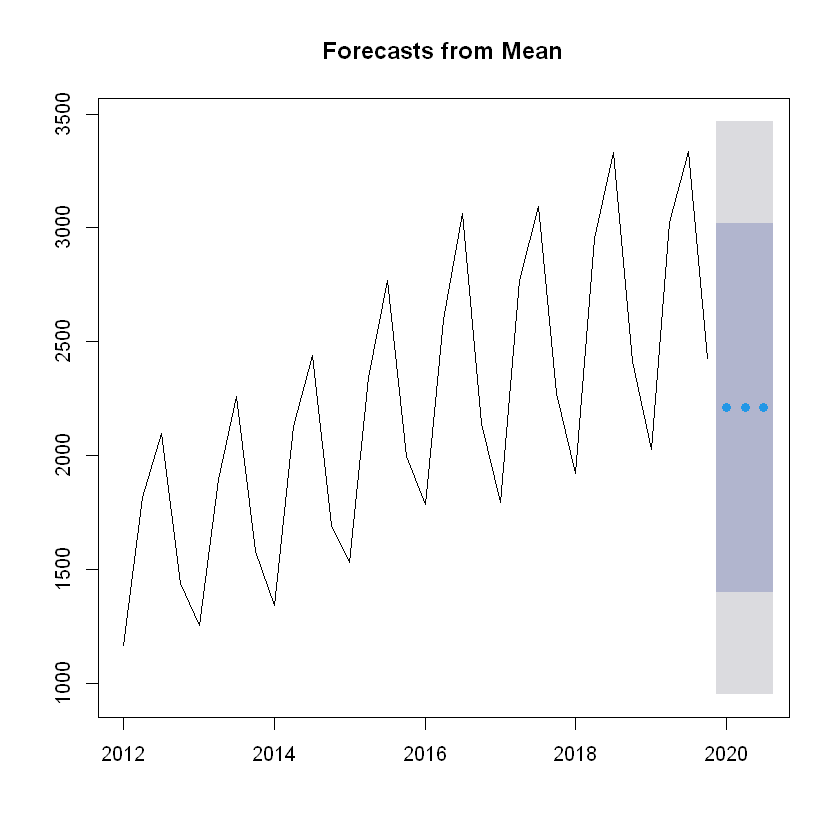

In [68]:
plot(fcast.mean)

In [69]:
summary(fcast.mean)


Forecast method: Mean

Model Information:
$mu
[1] 2209.075

$mu.se
[1] 107.4787

$sd
[1] 607.9913

$bootstrap
[1] FALSE

$call
meanf(y = trips, h = 3)

attr(,"class")
[1] "meanf"

Error measures:
                      ME    RMSE      MAE       MPE     MAPE     MASE      ACF1
Training set 1.98952e-13 598.416 497.1109 -8.180872 24.99967 3.244244 0.3989124

Forecasts:
        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2020 Q1       2209.075 1400.589 3017.561 949.8425 3468.308
2020 Q2       2209.075 1400.589 3017.561 949.8425 3468.308
2020 Q3       2209.075 1400.589 3017.561 949.8425 3468.308


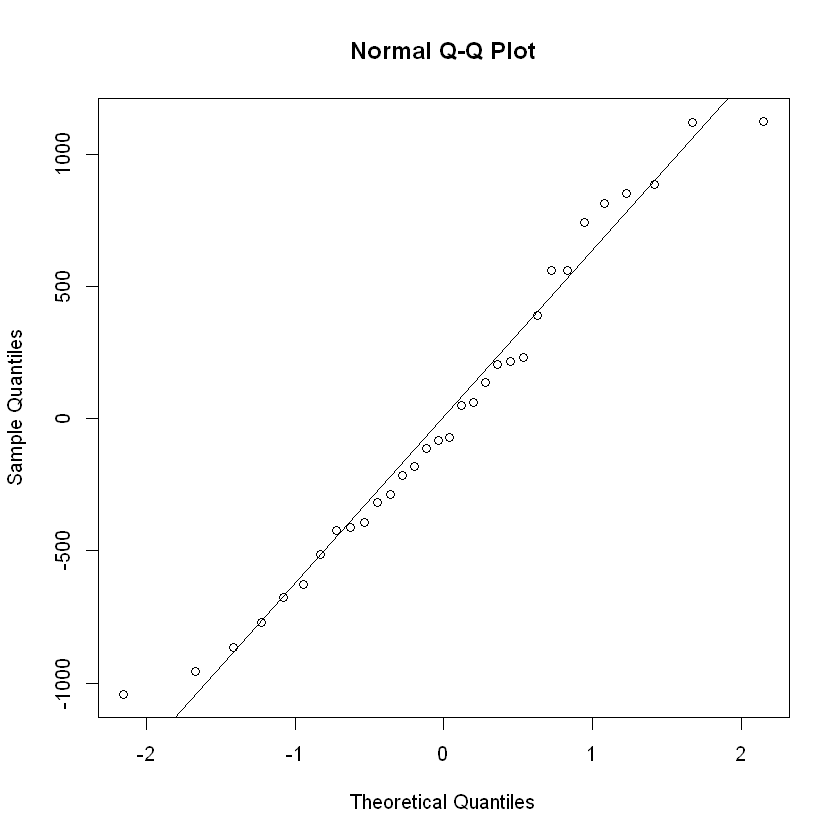

In [21]:
qqnorm(fcast.mean$residuals)
qqline(fcast.mean$residuals)

In [22]:
names(fcast.mean)

[1] "method"    "level"     "x"         "series"    "mean"      "lower"    
 [7] "upper"     "model"     "lambda"    "fitted"    "residuals"

In [53]:
mean(abs(residuals(fcast.mean)))

[1] 497.1109

# Forcasting Using Naive Model

In [24]:
fcast.naive<-naive(trips,h=3)
fcast.naive

        Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
2020 Q1         2424.6 1606.279 3242.921 1173.0863 3676.114
2020 Q2         2424.6 1267.320 3581.880  654.6923 4194.508
2020 Q3         2424.6 1007.227 3841.973  256.9146 4592.285

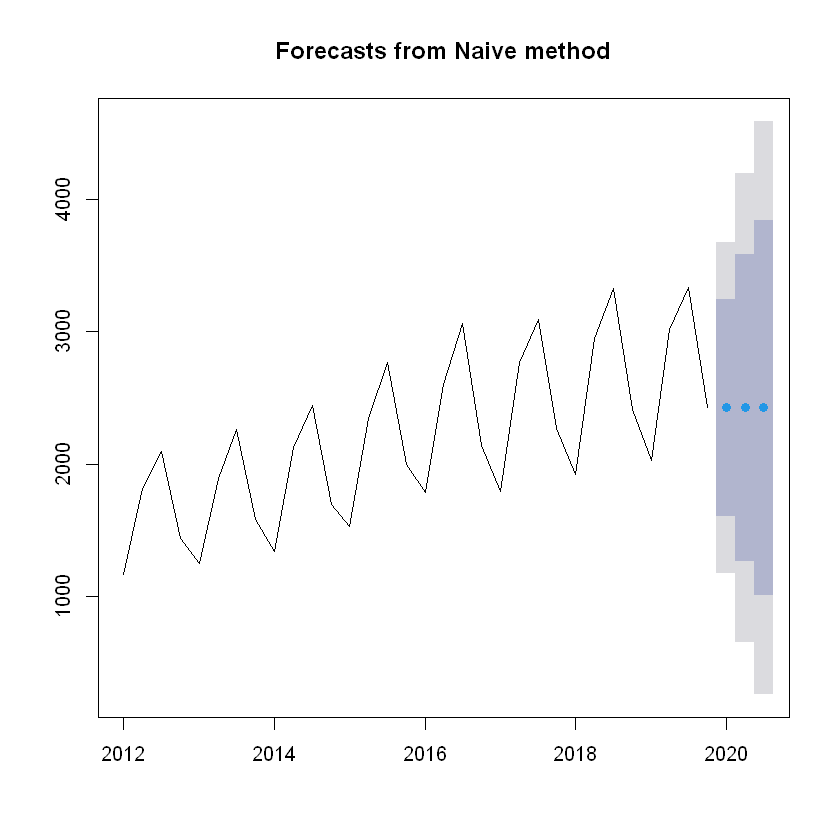

In [25]:
plot(fcast.naive)

In [26]:
summary(fcast.naive)


Forecast method: Naive method

Model Information:
Call: naive(y = trips, h = 3) 

Residual sd: 638.5391 

Error measures:
                   ME     RMSE      MAE      MPE     MAPE     MASE        ACF1
Training set 40.62903 638.5391 576.9581 -1.88058 26.39067 3.765343 -0.01138884

Forecasts:
        Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
2020 Q1         2424.6 1606.279 3242.921 1173.0863 3676.114
2020 Q2         2424.6 1267.320 3581.880  654.6923 4194.508
2020 Q3         2424.6 1007.227 3841.973  256.9146 4592.285


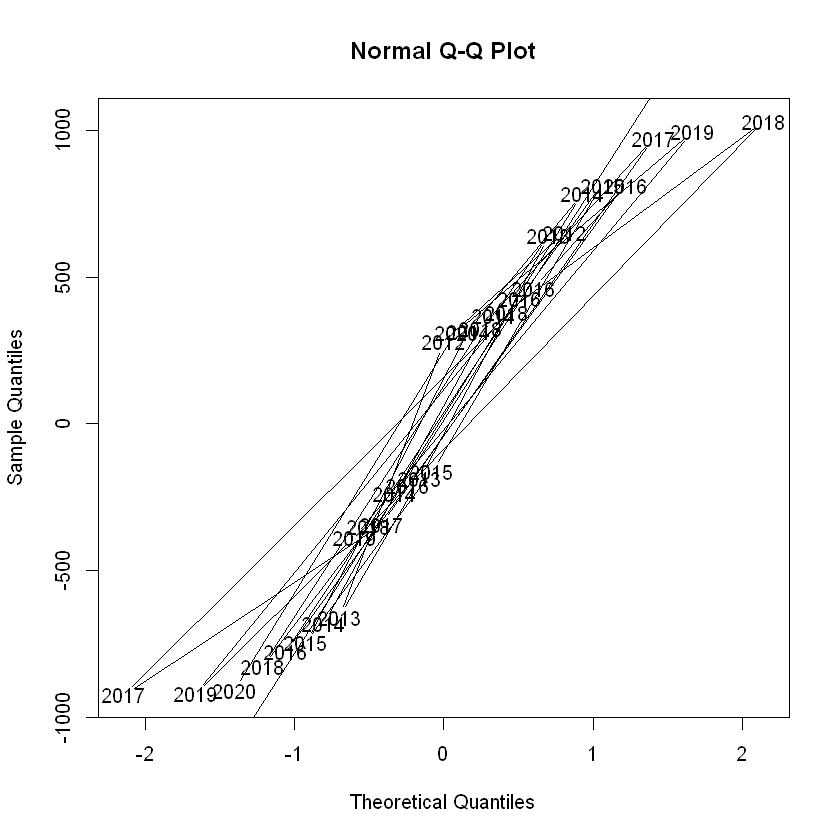

In [27]:
qqnorm(fcast.naive$residuals)
qqline(fcast.naive$residuals)

# Forecasting Using Seasonal Naive Model

In [28]:
fcast.seasonalnaive<-snaive(trips,h=4)
fcast.seasonalnaive

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2020 Q1         2026.7 1800.313 2253.087 1680.471 2372.929
2020 Q2         3021.8 2795.413 3248.187 2675.571 3368.029
2020 Q3         3334.4 3108.013 3560.787 2988.171 3680.629
2020 Q4         2424.6 2198.213 2650.987 2078.371 2770.829

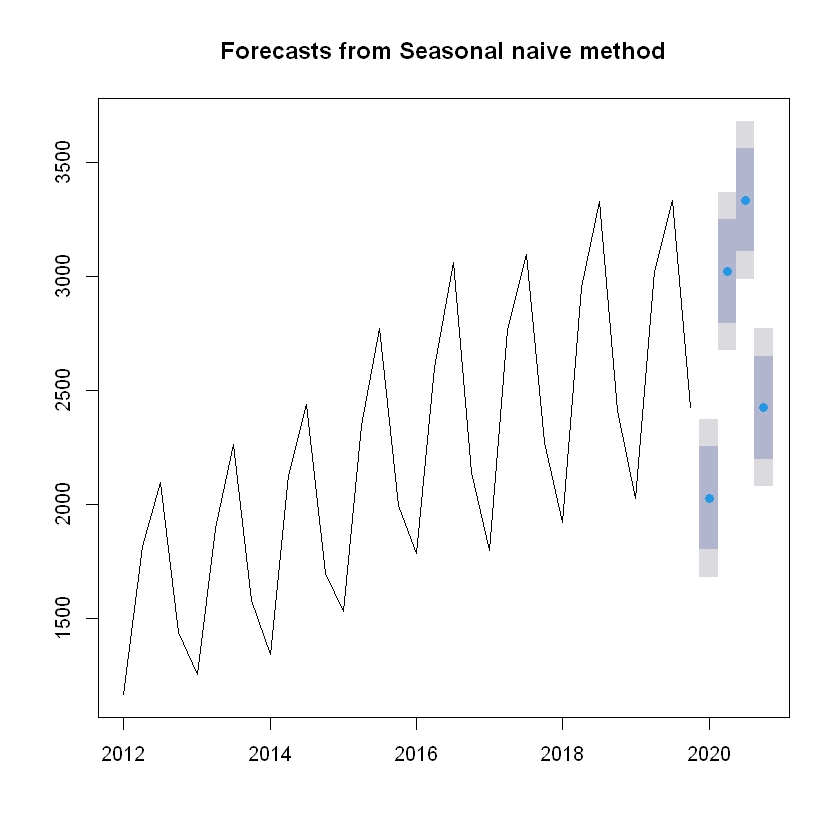

In [29]:
plot(fcast.seasonalnaive)

In [30]:
summary(fcast.seasonalnaive)


Forecast method: Seasonal naive method

Model Information:
Call: snaive(y = trips, h = 4) 

Residual sd: 176.6505 

Error measures:
                   ME     RMSE      MAE      MPE     MAPE MASE      ACF1
Training set 153.2286 176.6505 153.2286 6.975085 6.975085    1 0.5355186

Forecasts:
        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2020 Q1         2026.7 1800.313 2253.087 1680.471 2372.929
2020 Q2         3021.8 2795.413 3248.187 2675.571 3368.029
2020 Q3         3334.4 3108.013 3560.787 2988.171 3680.629
2020 Q4         2424.6 2198.213 2650.987 2078.371 2770.829


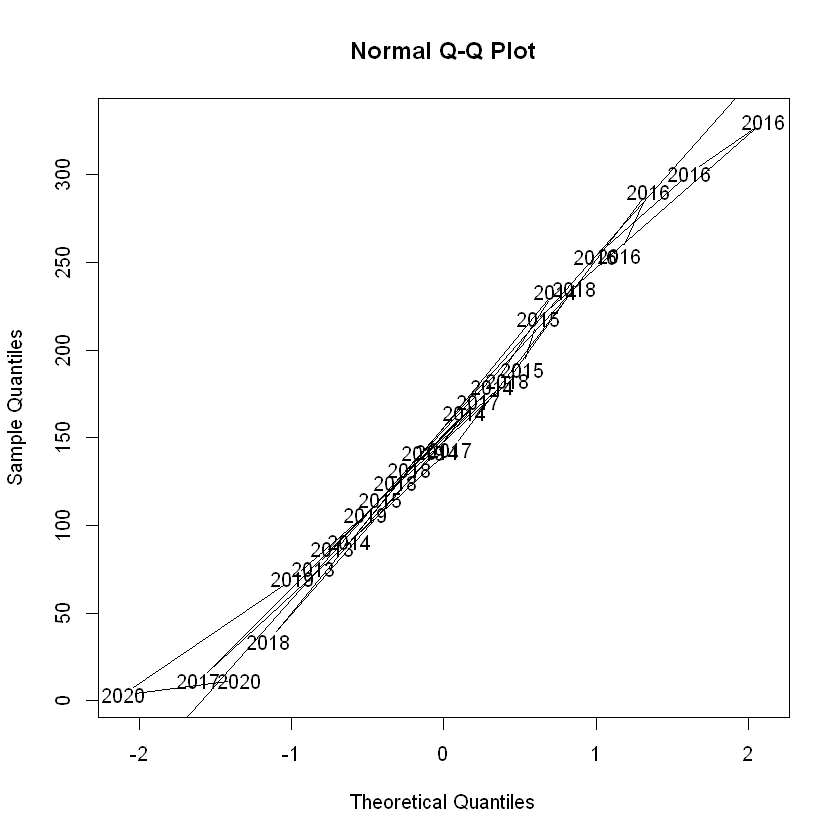

In [31]:
qqnorm(fcast.seasonalnaive$residuals)
qqline(fcast.seasonalnaive$residuals)

# Forecasting Using Simple Exponential Smoothing

# Forecast Using Drift Model

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Sep 1995       100635.0 84597.43 116672.6 76107.64 125162.4
Oct 1995       100764.1 78022.90 123505.2 65984.47 135543.6
Nov 1995       100893.1 72967.00 128819.2 58183.82 143602.3
Dec 1995       101022.1 68690.65 133353.6 51575.41 150468.8

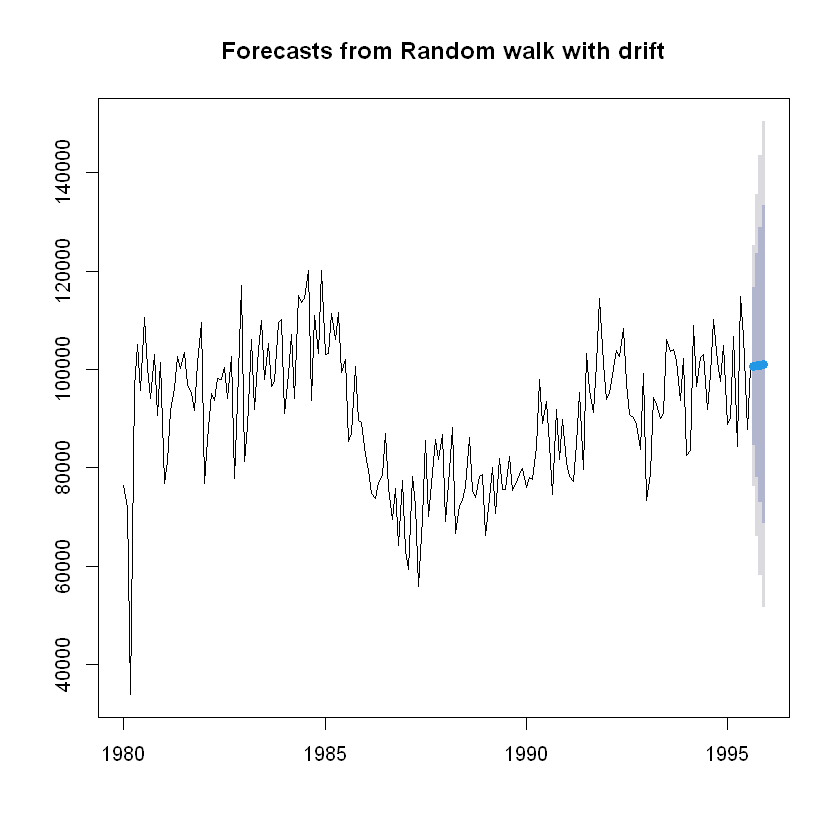

In [32]:
fcast.drift<-rwf(pigs,h=4, drift=TRUE)
fcast.drift
plot(fcast.drift)

In [33]:
accuracy(fcast.drift)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,9.337462e-13,12480.7,9431.191,-1.204473,10.95713,0.9436955,-0.4292465


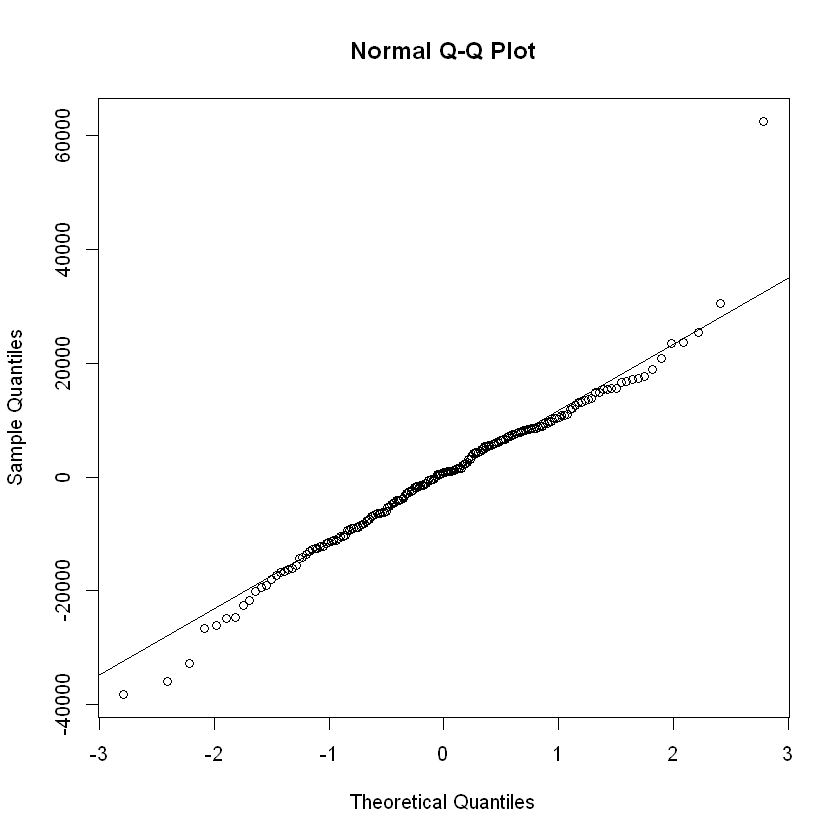

In [34]:
qqnorm(fcast.drift$residuals)
qqline(fcast.drift$residuals)

In [35]:
Box.test(fcast.drift$residuals, type='Ljung-Box')


	Box-Ljung test

data:  fcast.drift$residuals
X-squared = 35.011, df = 1, p-value = 3.279e-09


# Linear Model

In [36]:
tripsLM <- lm(trips~time(trips))

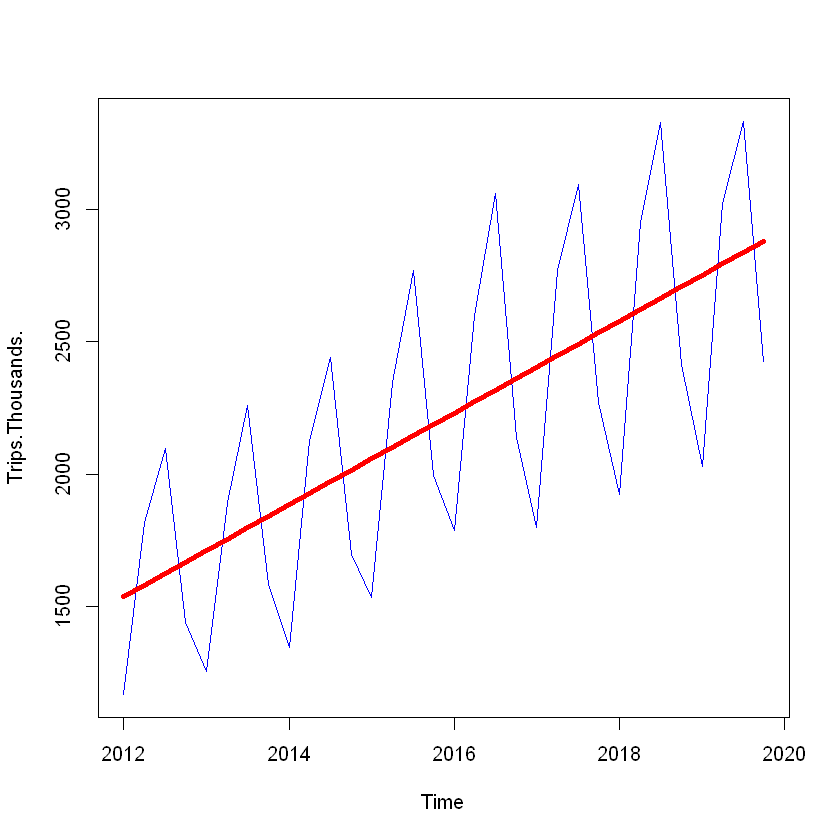

In [37]:
plot(trips, col='blue')
x <- as.vector(time(trips))
y <- predict.lm(tripsLM)
lines(x, y, col='red', lw=4)

# Moving Averages

An overlay plot shows how the moving average can be used to smooth out the seasonal element:

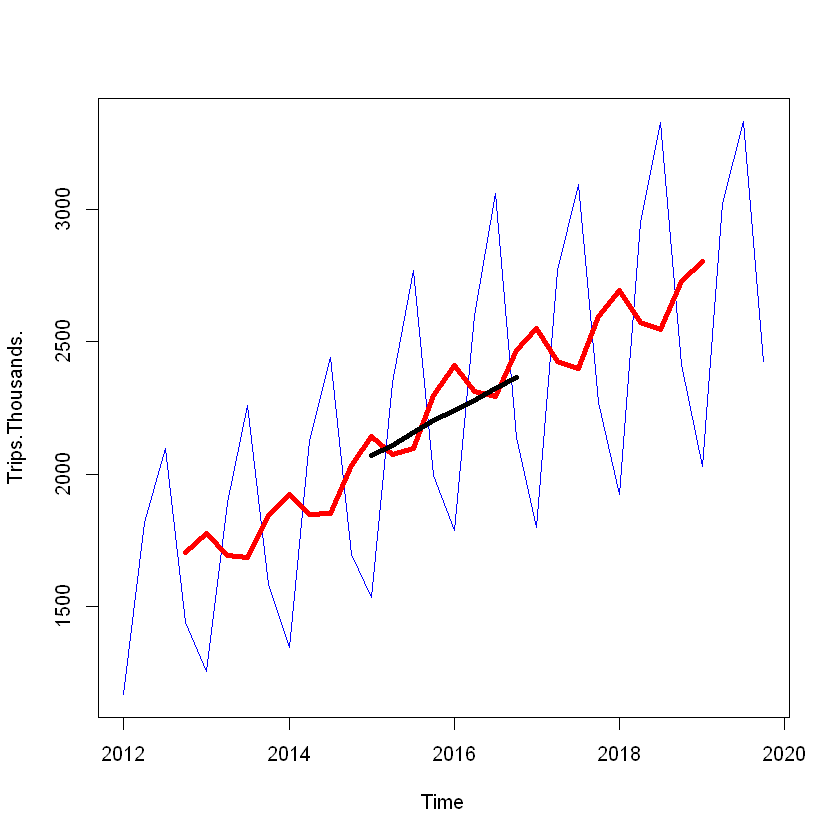

In [38]:
plot(trips, col='blue')
x <- as.vector(time(trips))
y <- ma(trips, order=6)
lines(x, y, col='red', lw=4)
y <- ma(trips, order=24)
lines(x, y, col='black', lw=4)

An overlay of the linear model with the above trendline from the moving averages looks like this:

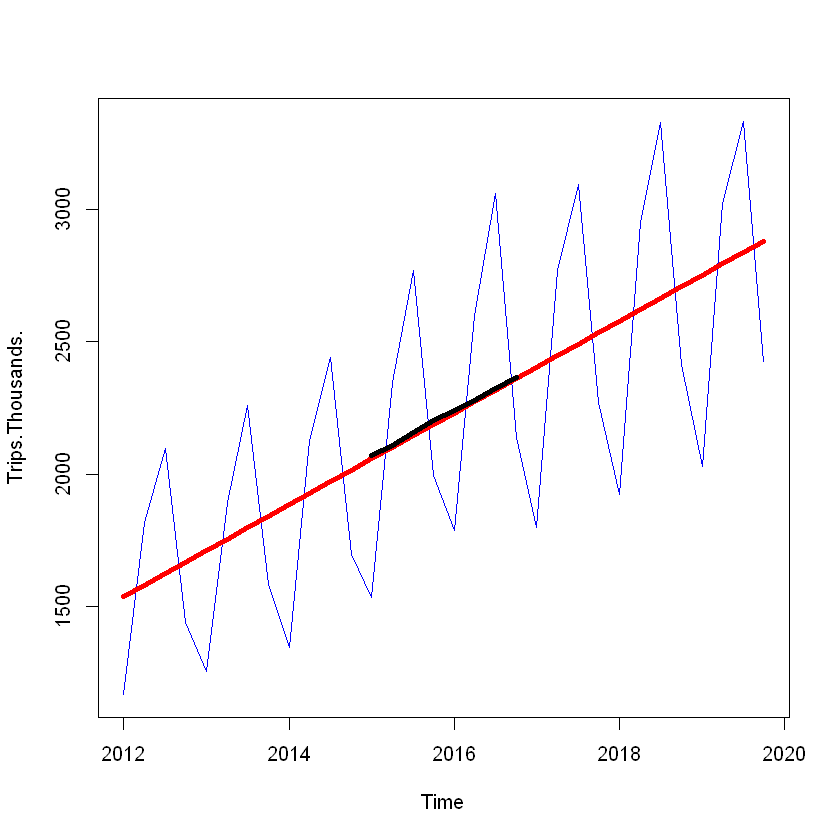

In [39]:
plot(trips, col='blue')
x <- as.vector(time(trips))
y <- predict.lm(tripsLM)
lines(x, y, col='red', lw=4)
y <- ma(trips, order=24)
lines(x, y, col='black', lw=4)

# Logarithmic Model

In [40]:
logtrips <- log(trips)

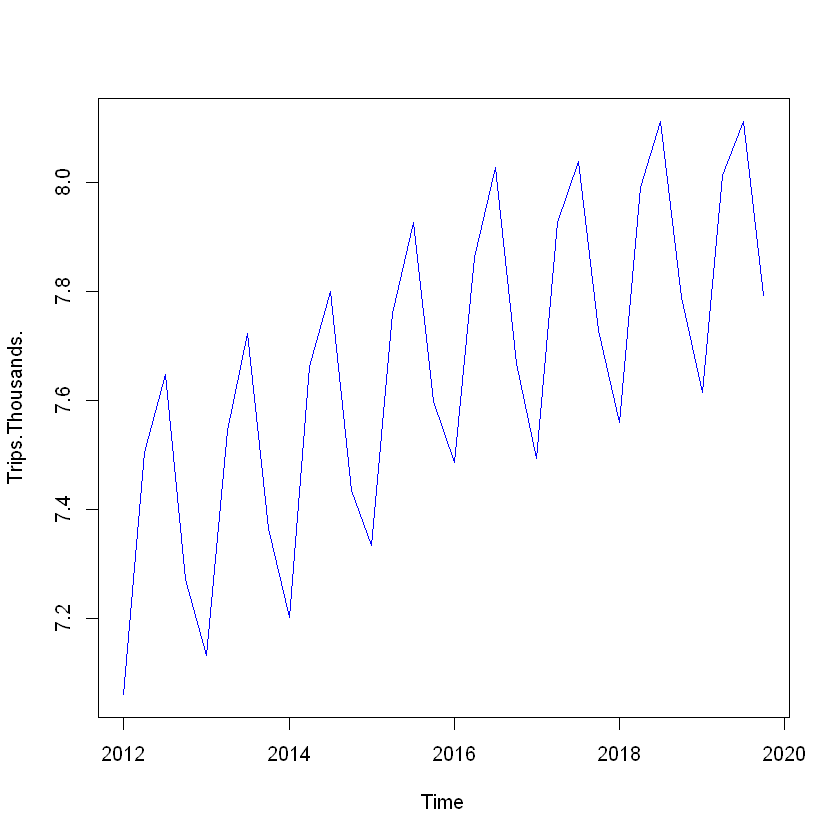

In [41]:
plot(logtrips, col='blue')
x <- as.vector(time(logtrips))
y <- predict.lm(tripsLM)
lines(x, y, col='red', lw=4)

# Exponential smoothing model

- Since the time serie has level, trend and seasonal components, we usea triple exponential model, Holt-Winters exponential smoothing

- Since the fluttuations in the end of the graph are bigger than in the beginning, we use the multiplicative version
- The plot contains the confidence interval of 80 and 95%

In [80]:
fitAdd <- hw(trips, seasonal='additive')
summary(fitAdd)


Forecast method: Holt-Winters' additive method

Model Information:
Holt-Winters' additive method 

Call:
 hw(y = trips, seasonal = "additive") 

  Smoothing parameters:
    alpha = 0.3321 
    beta  = 3e-04 
    gamma = 0.6679 

  Initial states:
    l = 1596.4304 
    b = 32.9458 
    s = -262.2796 569.9213 239.1474 -546.789

  sigma:  88.4542

     AIC     AICc      BIC 
406.5767 414.7586 419.7684 

Error measures:
                   ME     RMSE     MAE       MPE     MAPE      MASE     ACF1
Training set 4.269922 76.60357 63.3862 0.1208015 2.965039 0.4136709 0.176433

Forecasts:
        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2020 Q1       2095.228 1981.869 2208.587 1921.861 2268.595
2020 Q2       3109.465 2990.011 3228.919 2926.776 3292.154
2020 Q3       3448.493 3323.231 3573.755 3256.921 3640.065
2020 Q4       2556.527 2425.706 2687.347 2356.453 2756.600
2021 Q1       2227.155 2053.975 2400.334 1962.299 2492.010
2021 Q2       3241.392 3064.137 3418.647 2970.304 3512.480

In [81]:
mean(abs(residuals(fitAdd)))

[1] 63.3862

Warning message:
"Ignoring unknown parameters: main"


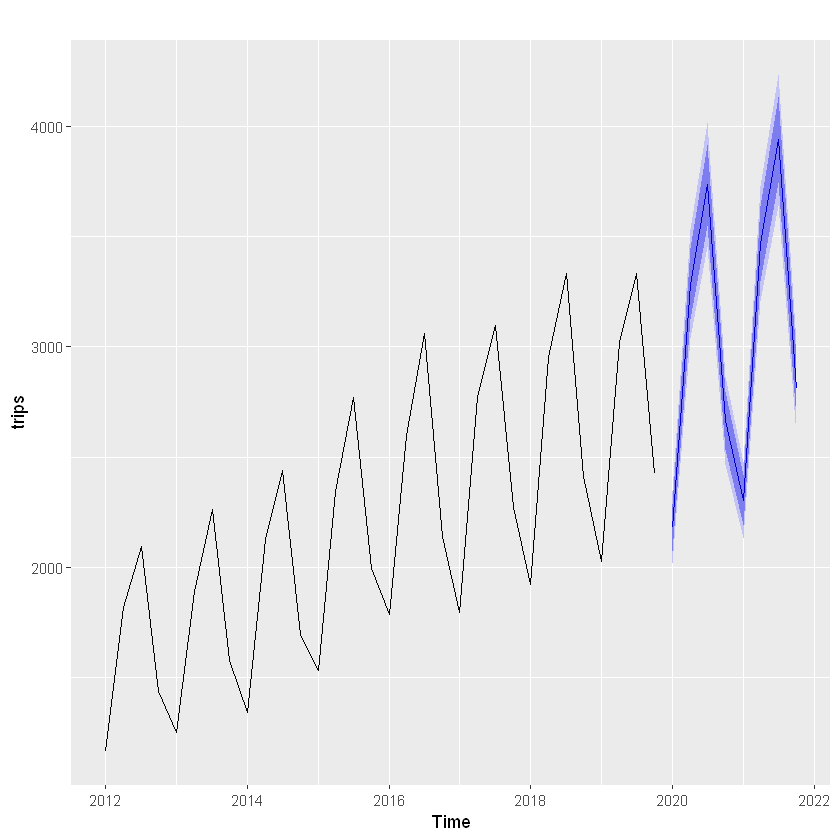

In [82]:
fitMult <- hw(trips, seasonal='multiplicative')
autoplot(trips)+autolayer(fitMult, main="Holt Winter Multiplicative Forecast")

In [83]:
summary(fitMult)


Forecast method: Holt-Winters' multiplicative method

Model Information:
Holt-Winters' multiplicative method 

Call:
 hw(y = trips, seasonal = "multiplicative") 

  Smoothing parameters:
    alpha = 0.0172 
    beta  = 0.002 
    gamma = 1e-04 

  Initial states:
    l = 1544.9426 
    b = 42.1401 
    s = 0.8811 1.2516 1.116 0.7513

  sigma:  0.0384

     AIC     AICc      BIC 
402.0749 410.2567 415.2665 

Error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set -16.59663 72.44923 57.49647 -1.052437 2.753433 0.3752334 0.6343327

Forecasts:
        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2020 Q1       2180.207 2072.930 2287.483 2016.141 2344.272
2020 Q2       3284.157 3122.532 3445.782 3036.973 3531.342
2020 Q3       3734.601 3550.769 3918.432 3453.454 4015.747
2020 Q4       2665.314 2534.085 2796.544 2464.616 2866.013
2021 Q1       2303.393 2189.951 2416.836 2129.898 2476.889
2021 Q2       3467.136 3296.324 3637.948 3205.

In [84]:
names(fitMult)

[1] "model"     "mean"      "level"     "x"         "upper"     "lower"    
 [7] "fitted"    "method"    "series"    "residuals"

In [85]:
mean(abs(residuals(fitMult)))

[1] 0.02702781

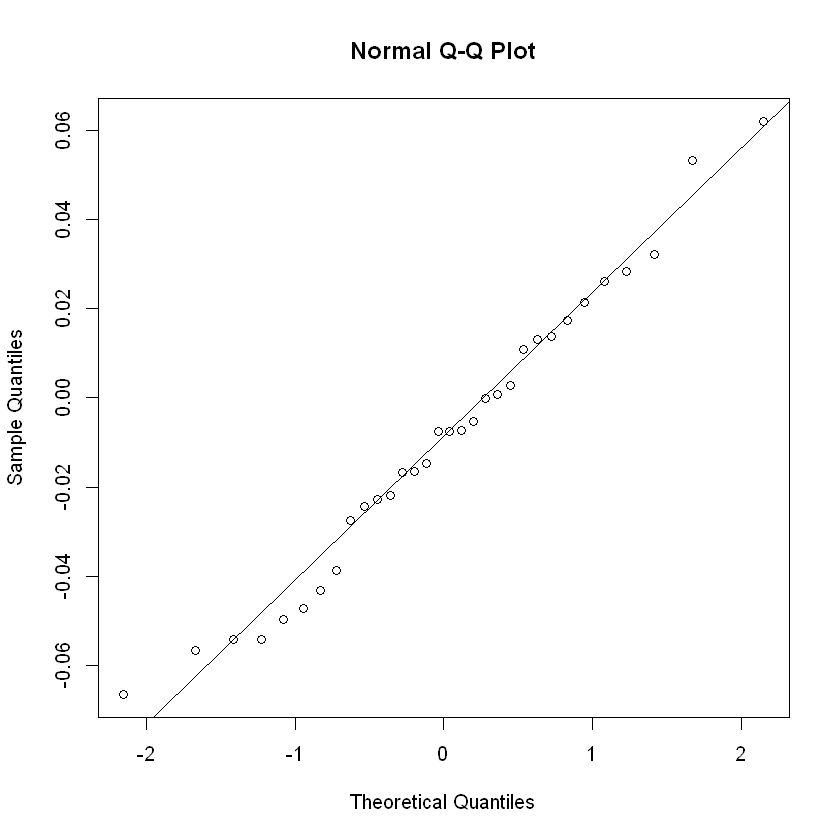

In [86]:
qqnorm(fitMult$residuals)
qqline(fitMult$residuals)


# Auto Arima

In [54]:
fitAutoArima <- auto.arima(trips)

In [55]:
fitAutoArima

Series: trips 
ARIMA(1,0,0)(0,1,0)[4] with drift 

Coefficients:
         ar1    drift
      0.5835  35.9414
s.e.  0.1585   7.9346

sigma^2 estimated as 5616:  log likelihood=-159.77
AIC=325.53   AICc=326.53   BIC=329.53

In [56]:
summary(fitAutoArima)

Series: trips 
ARIMA(1,0,0)(0,1,0)[4] with drift 

Coefficients:
         ar1    drift
      0.5835  35.9414
s.e.  0.1585   7.9346

sigma^2 estimated as 5616:  log likelihood=-159.77
AIC=325.53   AICc=326.53   BIC=329.53

Training set error measures:
                   ME     RMSE      MAE         MPE     MAPE      MASE
Training set 1.570482 67.54754 55.32141 -0.09590574 2.451533 0.3610385
                   ACF1
Training set -0.0396672


In [57]:
accuracy(fitAutoArima)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,1.570482,67.54754,55.32141,-0.09590574,2.451533,0.3610385,-0.0396672


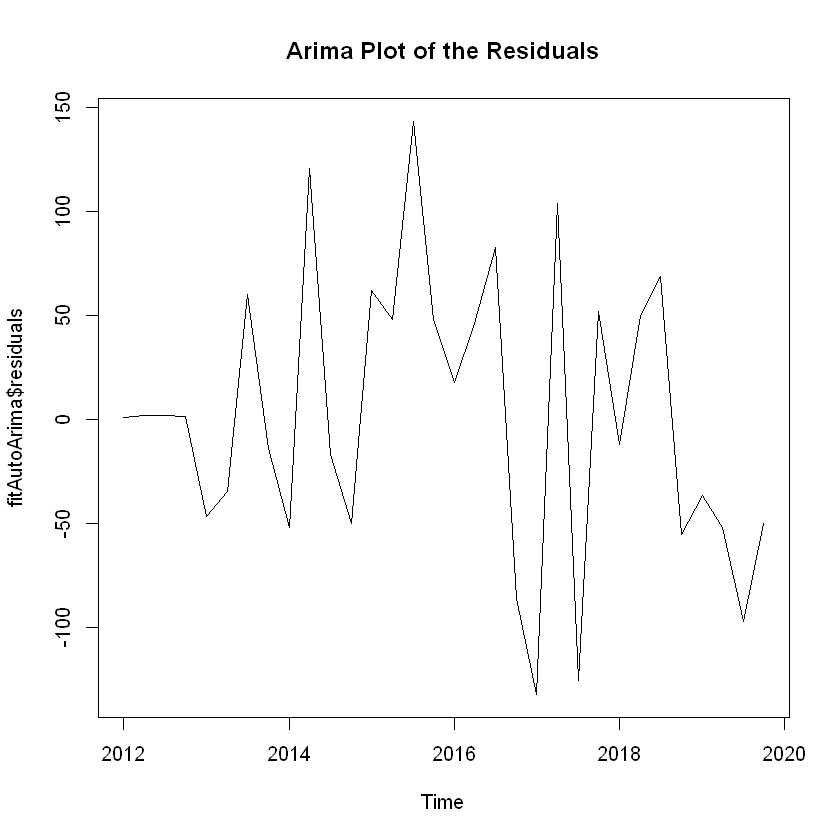

In [62]:
plot(fitAutoArima$residuals, main="Arima Plot of the Residuals")

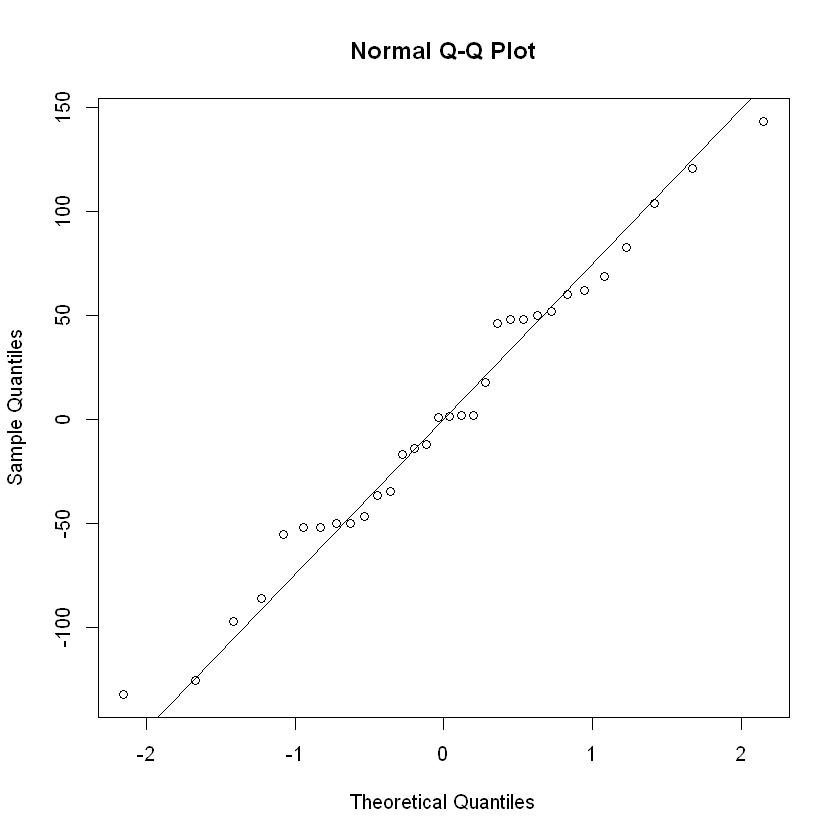

In [63]:
qqnorm(fitAutoArima$residuals)
qqline(fitAutoArima$residuals)

In [64]:
forecast(fitAutoArima,3)

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2020 Q1       2093.465 1997.429 2189.501 1946.590 2240.339
2020 Q2       3120.636 3009.447 3231.825 2950.587 3290.685
2020 Q3       3451.950 3336.053 3567.846 3274.701 3629.198

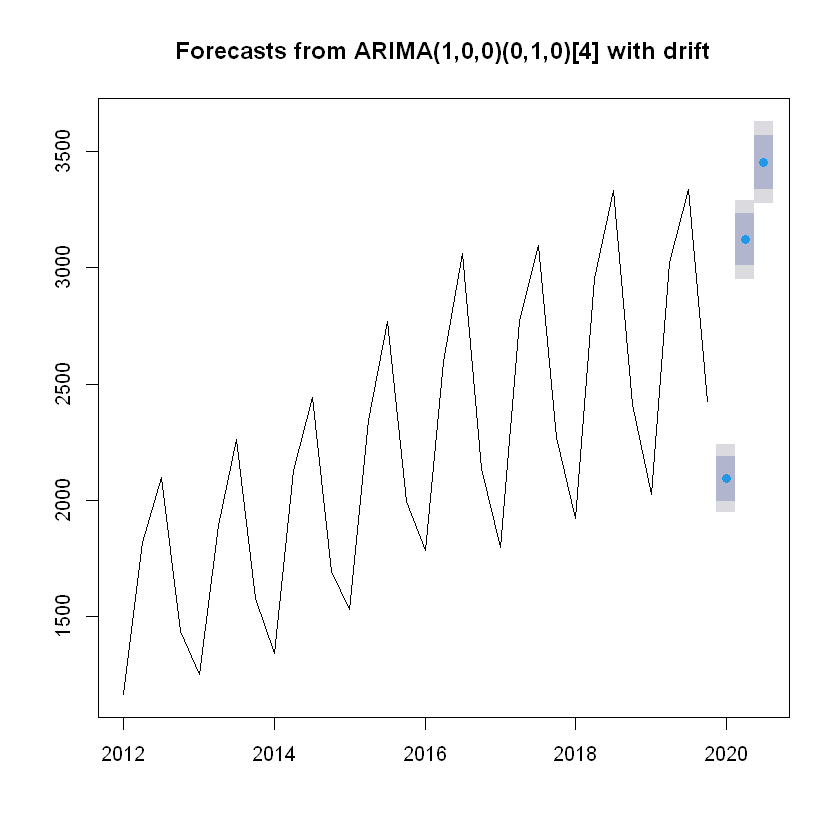

In [65]:
plot(forecast(fitAutoArima,3))

In [70]:
mean(abs(fitAutoArima$residuals))

[1] 55.32141